#### Sklearn 实现SVM

In [1]:
# 导入相关包
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
# 加载数据
def loadDataSet(fileName):
    dataMat = []
    labelMat = []

    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

X,y = loadDataSet('./data/svm1.txt')
print(X[0:5])
print(y[0:5])

[[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
[-1.0, -1.0, 1.0, -1.0, 1.0]


In [26]:
# 定义模型
model = LinearSVC(C=20) # C越大，分类错误的惩罚越大，有可能过拟合
# 训练
model.fit(X,y)
# 获取b值
b = model.intercept_
# 获取w值
w = model.coef_
print("b=",b)
print("w=",w)

b= [-3.47502706]
w= [[ 0.73271351 -0.25340269]]


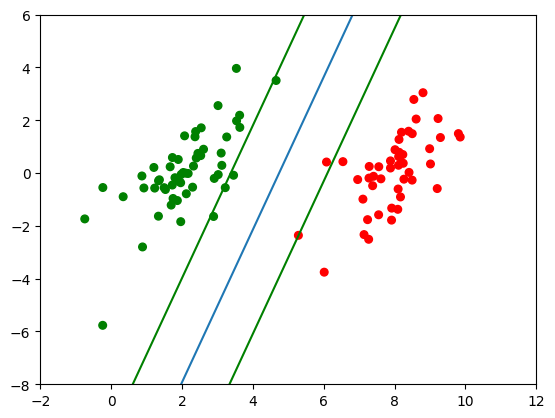

In [27]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

# 决策平面: wx + b = w0x0 + w1x1 + b = 0
x0 = np.arange(-2.0,12.0,0.1)
x1 = (-w[0][0]*x0 - b) / w[0][1]
ax.plot(x0,x1.reshape(-1,1))

# 间隔平面1: wx + b =  w0x0 + w1x1 + b = 1
pos0 = np.arange(-2.0,12.0,0.1)
pos1 = (1 - w[0][0]*pos0 - b)/w[0][1]
ax.plot(pos0,pos1.reshape(-1,1),color='green')

# 间隔平面2: wx + b =  w0x0 + w1x1 + b = -1
neg0 = np.arange(-2.0,12.0,0.1)
neg1 = (-1 - w[0][0]*neg0 - b)/w[0][1]
ax.plot(neg0,neg1.reshape(-1,1),color='green')

ax.axis([-2,12,-8,6])
plt.show()